In [3]:
#source: https://www.kaggle.com/roshansharma/market-basket-analysis/notebook
!pip install squarify wordcloud mlxtend
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud

# for market basket analysis (rules & itemsets)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [5]:
import warnings
warnings.filterwarnings('ignore')
# reading the dataset into a pandas data frame
data = pd.read_csv('/content/sample_data/Market_Basket_Optimisation.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [6]:
# explore the first rows in the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# explore the last rows in the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# get a random data sample

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2315,burgers,escalope,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2903,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6053,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7445,parmesan cheese,whole wheat pasta,brownies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3881,butter,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6219,shrimp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,pancakes,whole wheat rice,candy bars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3244,tomato sauce,spaghetti,olive oil,mushroom cream sauce,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7067,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,turkey,ground beef,spaghetti,soup,escalope,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization


In [9]:
#stack all columns into one super column and drop NaN values
super_column=data.stack().dropna()

super_column

0     0             shrimp
      1            almonds
      2            avocado
      3     vegetables mix
      4       green grapes
                ...       
7499  1          green tea
7500  0               eggs
      1    frozen smoothie
      2        yogurt cake
      3     low fat yogurt
Length: 29363, dtype: object

In [10]:
#conver the super column into a list
super_list=list(super_column)
print(super_list)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil', 'burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'low fat yogurt', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'green tea', 'french fries', 'eggs', 'pet food', 'cookies', 'turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil', 'spaghetti', 'champagne', 'cookies', 'mineral water', 'salmon', 'mineral water', 'shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt', 'turkey', 'eggs', 'turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate', 'meatballs', 'milk', 

In [11]:
#convert the super list into a text paragraph
super_text=''
for item in super_list:
    super_text+=item.replace(' ','_')+' '

super_text

'shrimp almonds avocado vegetables_mix green_grapes whole_weat_flour yams cottage_cheese energy_drink tomato_juice low_fat_yogurt green_tea honey salad mineral_water salmon antioxydant_juice frozen_smoothie spinach olive_oil burgers meatballs eggs chutney turkey avocado mineral_water milk energy_bar whole_wheat_rice green_tea low_fat_yogurt whole_wheat_pasta french_fries soup light_cream shallot frozen_vegetables spaghetti green_tea french_fries eggs pet_food cookies turkey burgers mineral_water eggs cooking_oil spaghetti champagne cookies mineral_water salmon mineral_water shrimp chocolate chicken honey oil cooking_oil low_fat_yogurt turkey eggs turkey fresh_tuna tomatoes spaghetti mineral_water black_tea salmon eggs chicken extra_dark_chocolate meatballs milk honey french_fries protein_bar red_wine shrimp pasta pepper eggs chocolate shampoo rice sparkling_water spaghetti mineral_water ham body_spray pancakes green_tea burgers grated_cheese shrimp pasta avocado honey white_wine toothp

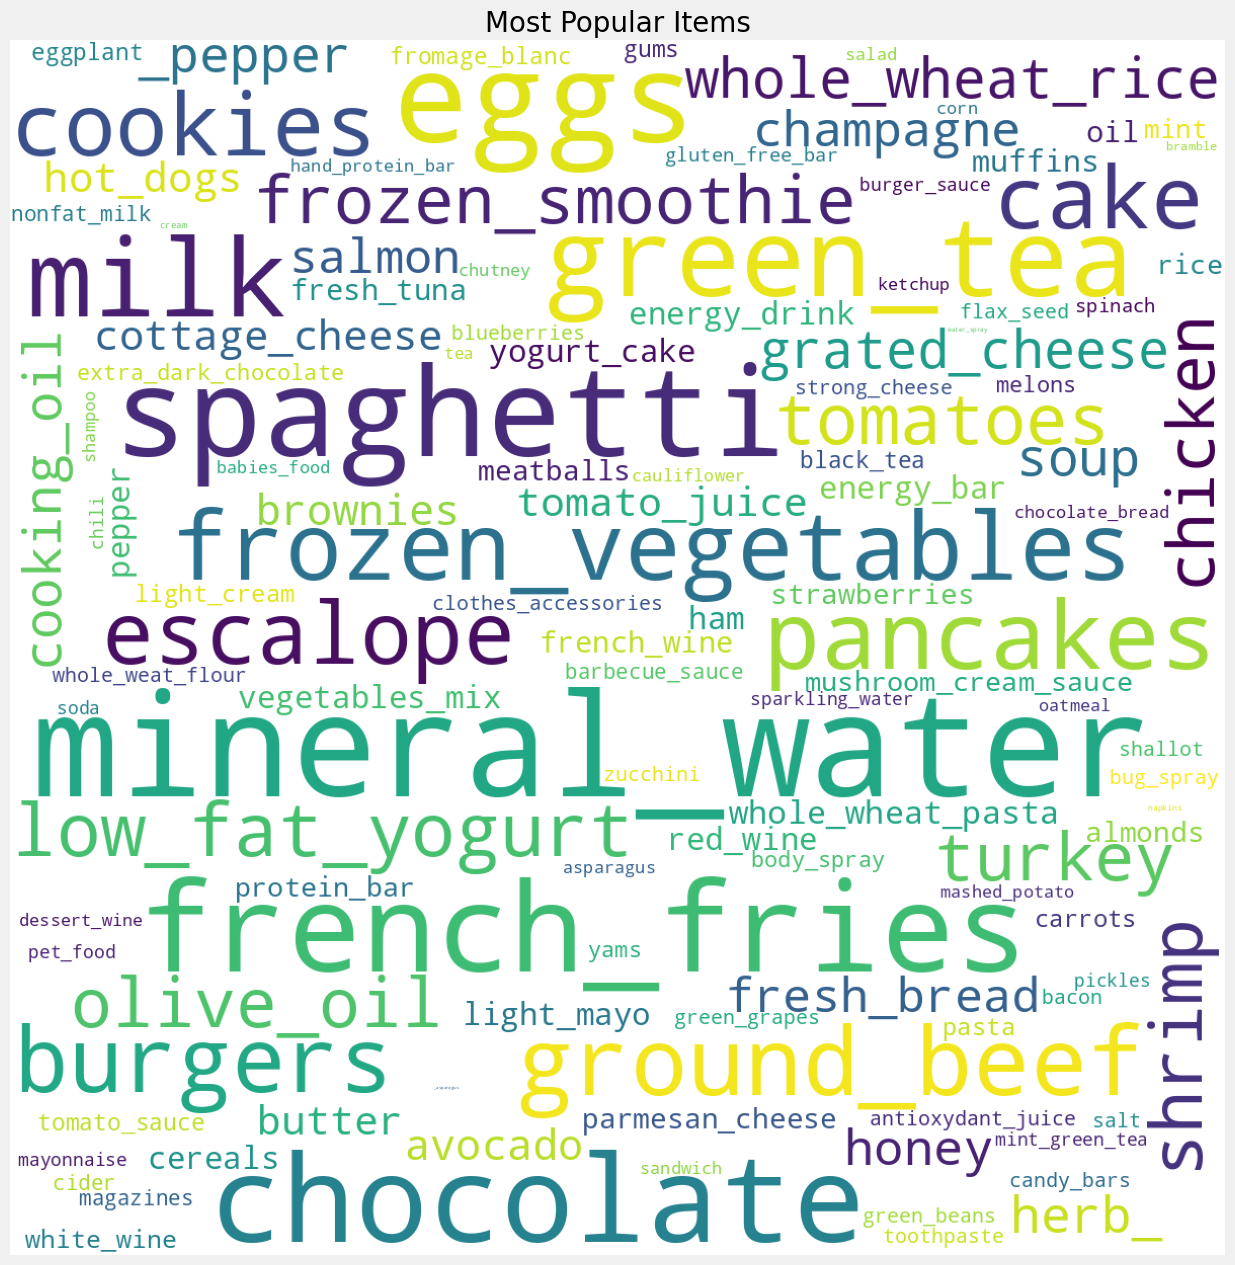

In [12]:
#general visualization parameters
plt.style.use('fivethirtyeight') # alternative styles: https://matplotlib.org/stable/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (15, 15) # figure size in inches

#create a word cloud
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200,collocations=False).generate(super_text)

#show the cloud
plt.imshow(wordcloud)# conver the wordcloud into an image format
plt.axis('off') # turn off the axes
plt.title('Most Popular Items',fontsize = 20) # add a title
plt.show() # show the wordcloud image


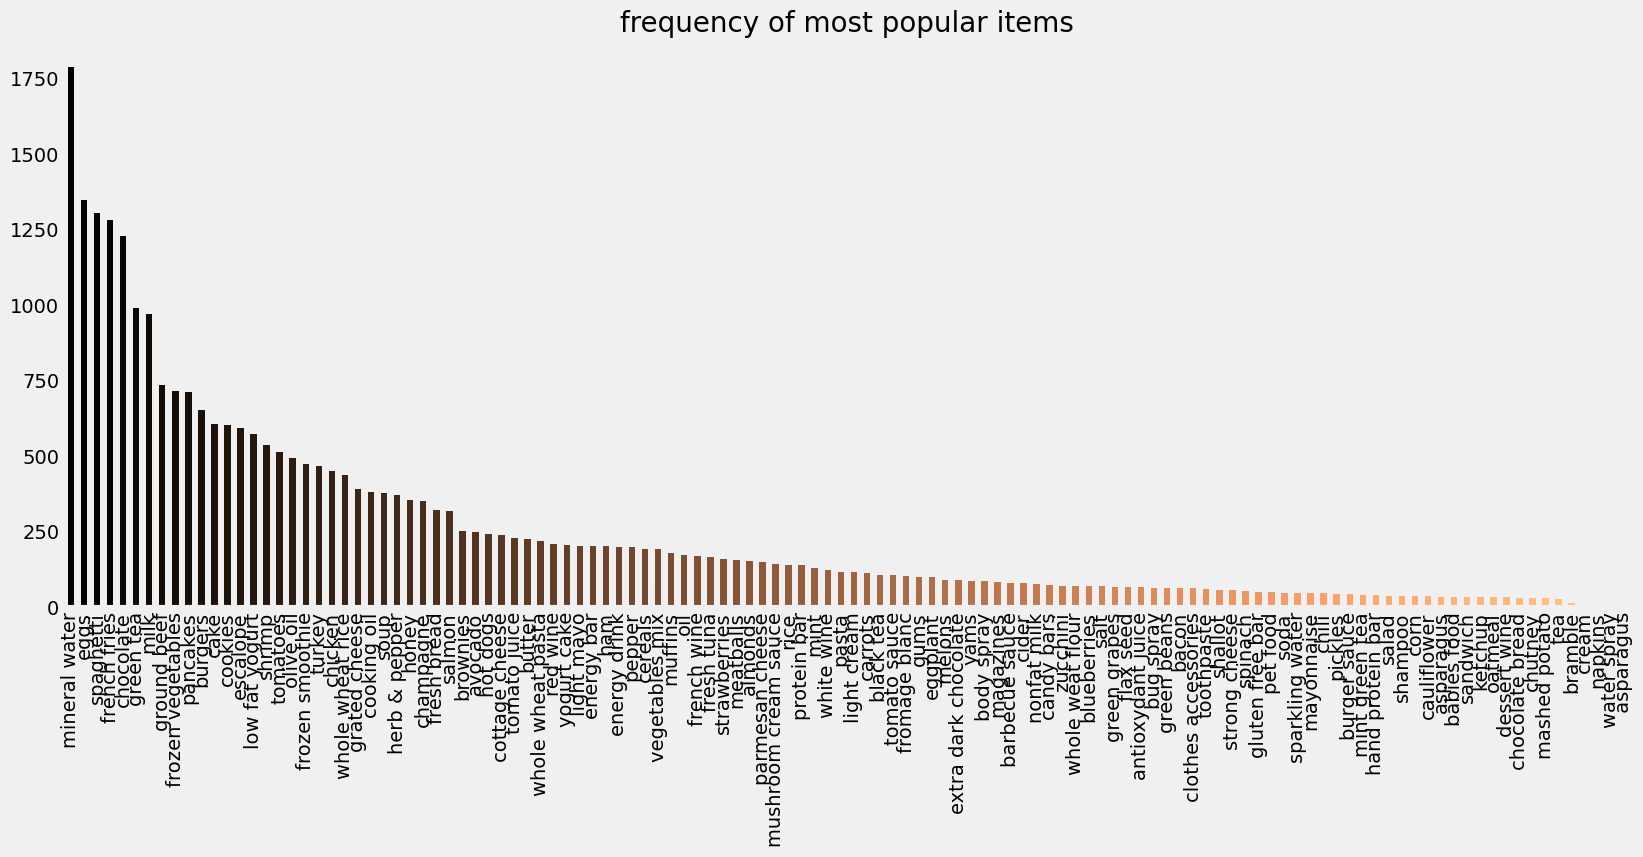

In [13]:
# looking at the frequency of most popular items

#get item frequencies
item_frequencies=super_column.value_counts()

#prepare plot
plt.rcParams['figure.figsize'] = (18, 7) # set a new figure sizes (in inches)
color = plt.cm.copper(np.linspace(0, 1, len(item_frequencies))) # pick a color gradient

item_frequencies.plot.bar(color = color)

plt.title('frequency of most popular items', fontsize = 20)# add title
plt.xticks(rotation = 90 ) # rotate the labels on the x axis
plt.grid()# turn off the grid
plt.show()

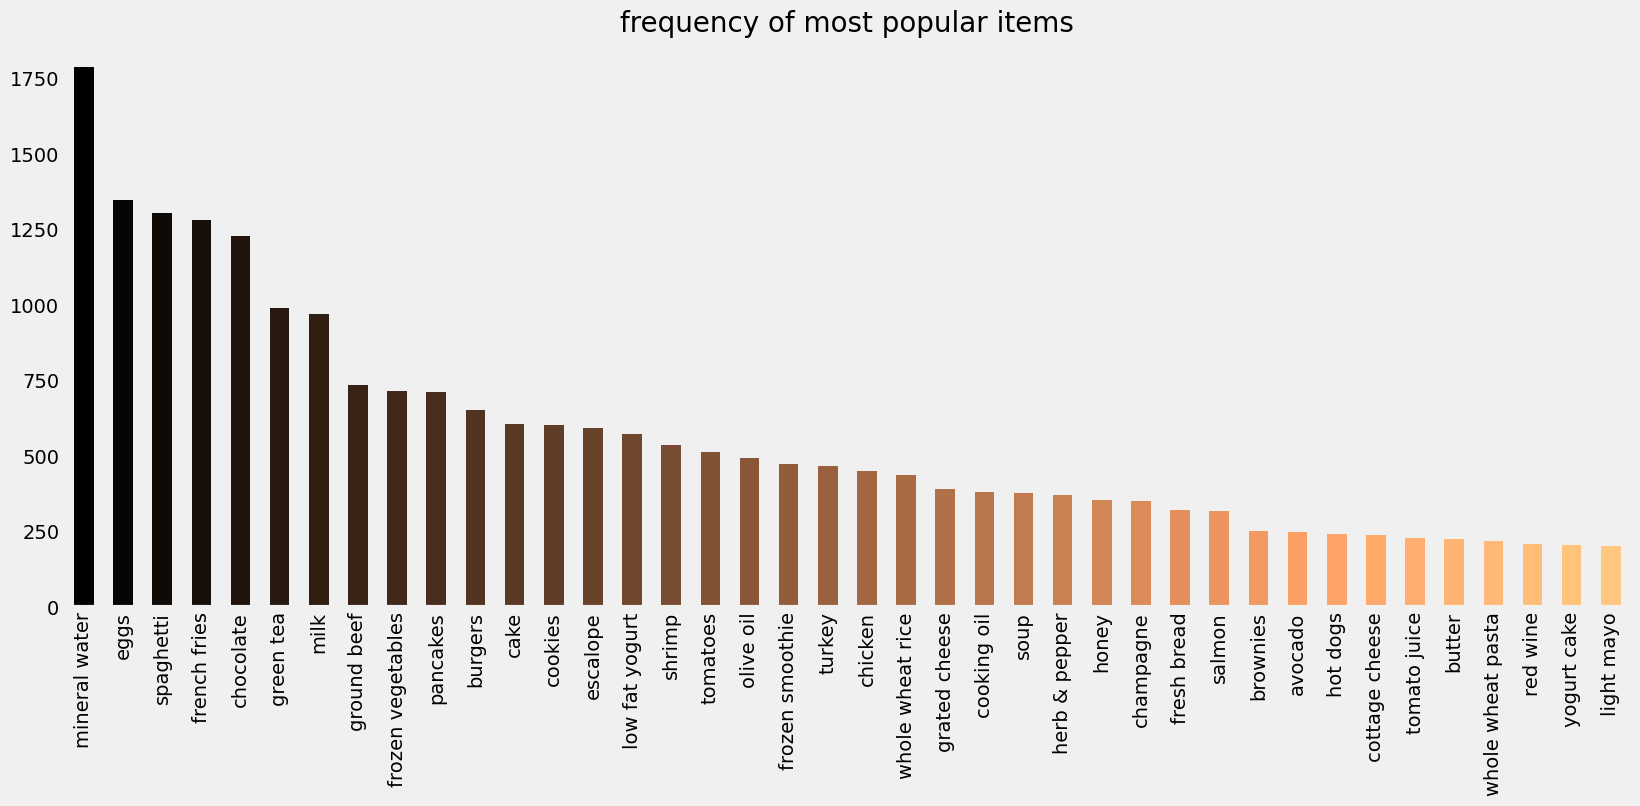

In [14]:
# previous plot was too messy, try again

top40=item_frequencies.head(40) # focus only on the top 40 items

plt.rcParams['figure.figsize'] = (18, 7) # set a new figure sizes (in inches)
color = plt.cm.copper(np.linspace(0, 1, 40)) # pick a color gradient

top40.plot.bar(color = color) # show only the top 40 items

plt.title('frequency of most popular items', fontsize = 20)# add title
plt.xticks(rotation = 90 ) # rotate the labels on the x axis
plt.grid()# turn off the grid
plt.show()

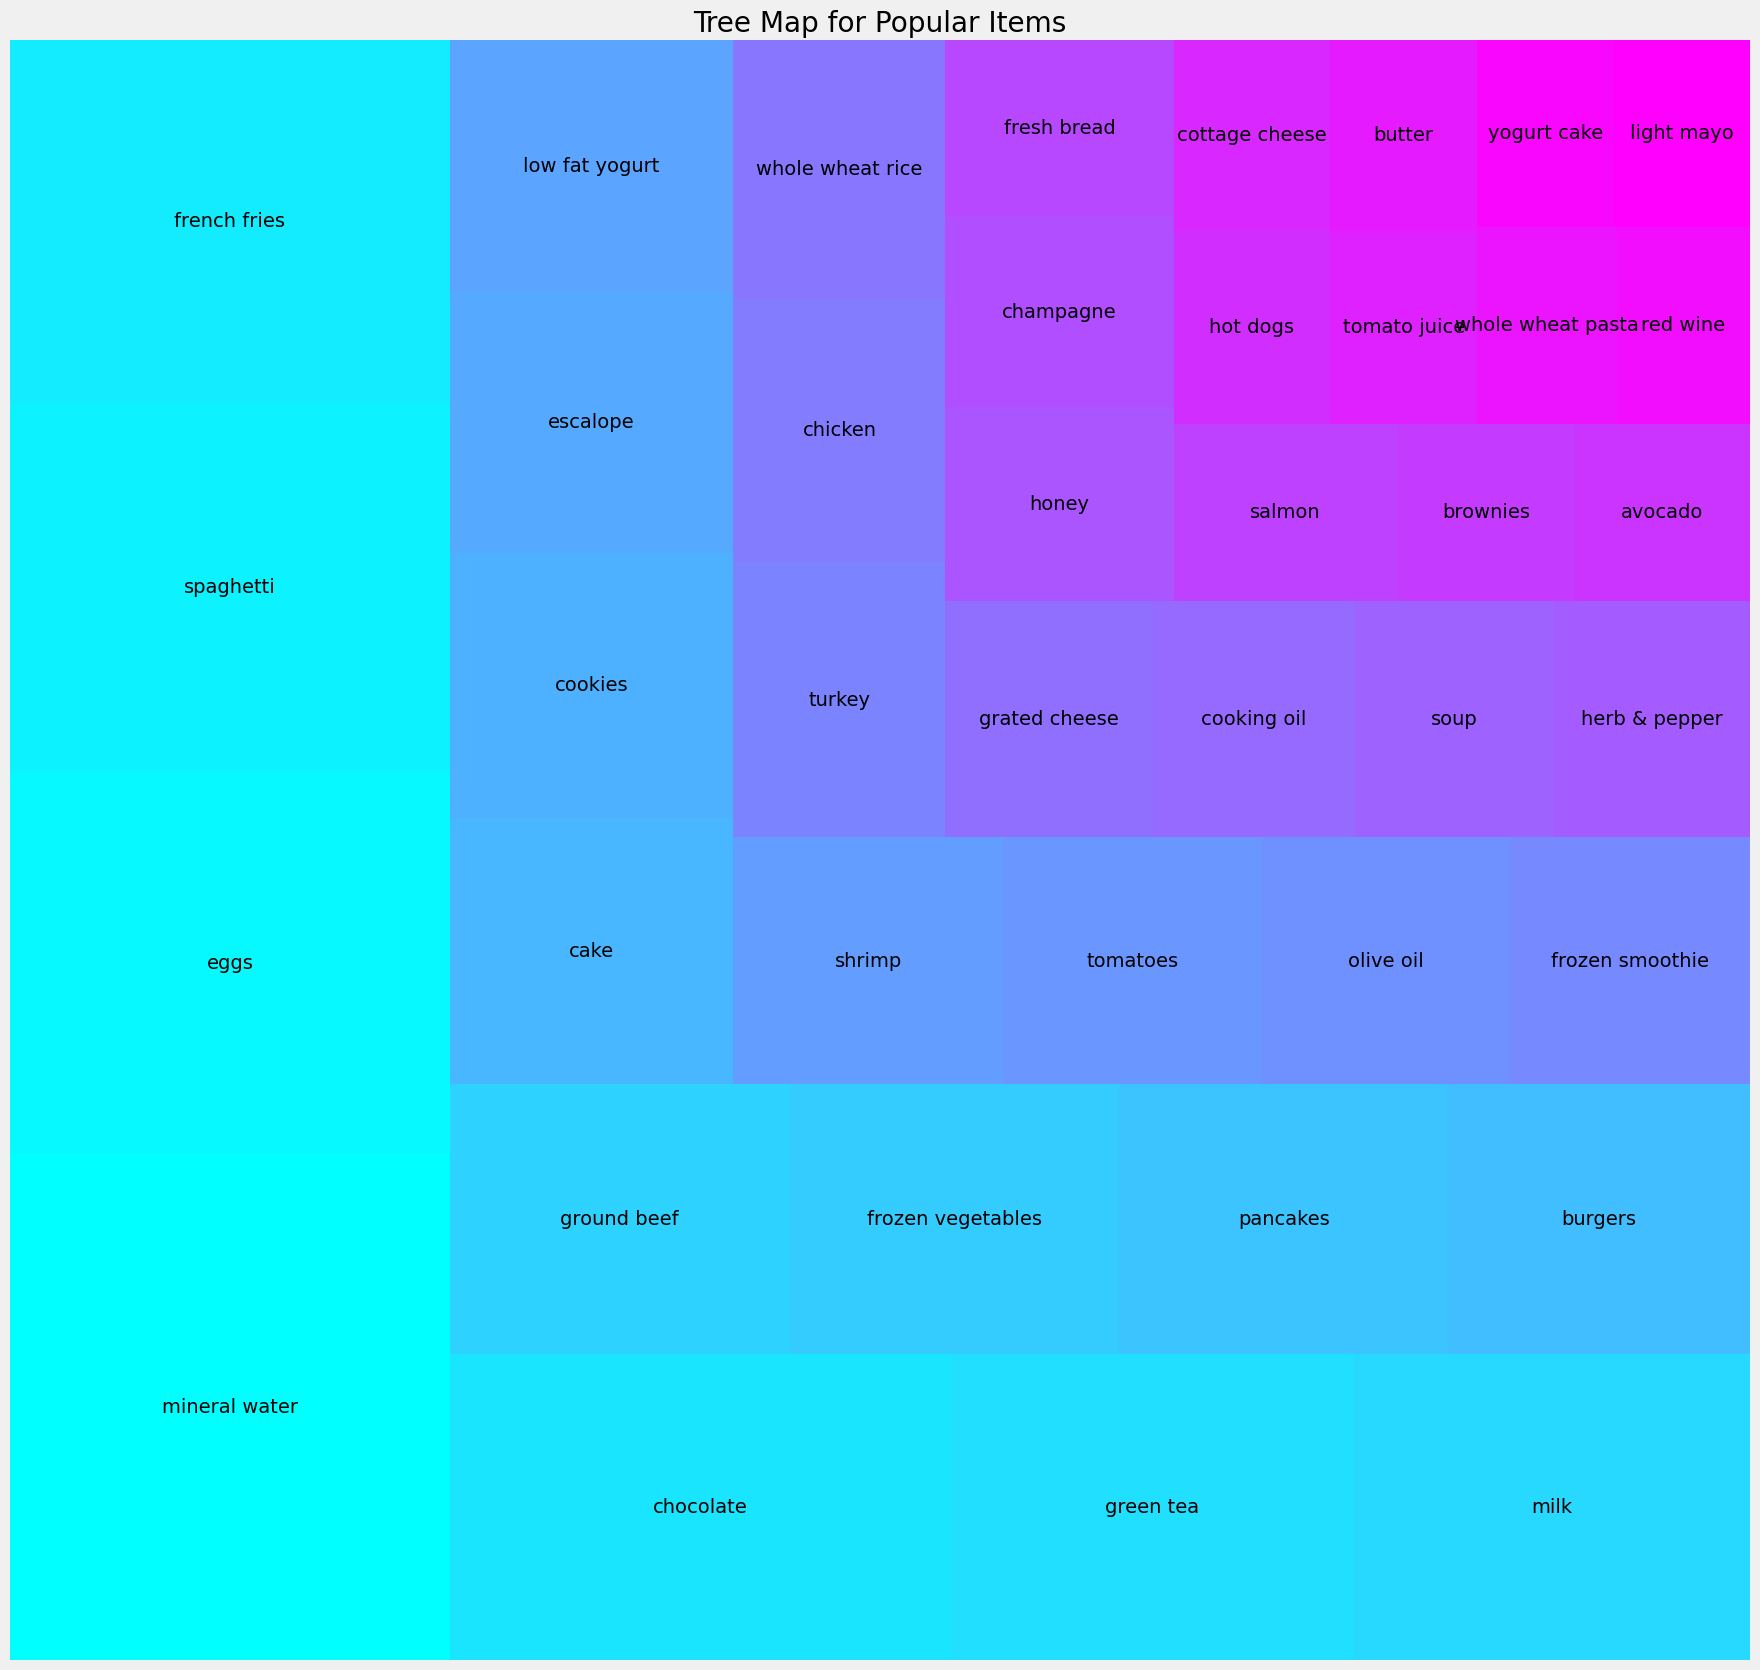

In [15]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 40))

squarify.plot(sizes = top40.values, label = top40.index, alpha=1, color = color)

plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

# Data Preprocessing for Market Basket Analysis

In [16]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# remove nan values
clean_rows=[]
for index, row in data.iterrows():
    clean_row=row.dropna()
    clean_rows.append(clean_row)

In [18]:
clean_rows[0]

,0
0,shrimp
1,almonds
2,avocado
3,vegetables mix
4,green grapes
5,whole weat flour
6,yams
7,cottage cheese
8,energy drink
9,tomato juice


### Using Transaction Encoder

In [19]:
te = TransactionEncoder()
transactions = te.fit_transform(clean_rows)

transactions


array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [20]:
#wrap the transactions in a dataframe
transactions_frame = pd.DataFrame(transactions, columns = te.columns_)

transactions_frame

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Finding frequent itemsets

In [21]:
#Now, let us return the items and itemsets with at least 5% support:
frequent_itemsets=apriori(transactions_frame, min_support = 0.05, use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


### Selecting and Filtering the Results


In [22]:
#simple printing
for index,row in frequent_itemsets.iterrows():
    print('The support for', list(row['itemsets']), 'is', round(row['support'],4))

The support for ['burgers'] is 0.0872
The support for ['cake'] is 0.0811
The support for ['chicken'] is 0.06
The support for ['chocolate'] is 0.1638
The support for ['cookies'] is 0.0804
The support for ['cooking oil'] is 0.0511
The support for ['eggs'] is 0.1797
The support for ['escalope'] is 0.0793
The support for ['french fries'] is 0.1709
The support for ['frozen smoothie'] is 0.0633
The support for ['frozen vegetables'] is 0.0953
The support for ['grated cheese'] is 0.0524
The support for ['green tea'] is 0.1321
The support for ['ground beef'] is 0.0983
The support for ['low fat yogurt'] is 0.0765
The support for ['milk'] is 0.1296
The support for ['mineral water'] is 0.2384
The support for ['olive oil'] is 0.0659
The support for ['pancakes'] is 0.0951
The support for ['shrimp'] is 0.0715
The support for ['soup'] is 0.0505
The support for ['spaghetti'] is 0.1741
The support for ['tomatoes'] is 0.0684
The support for ['turkey'] is 0.0625
The support for ['whole wheat rice'] is 0.0

In [ ]:
# select only itemsets with more than 1 item

#simple printing
for index,row in frequent_itemsets.iterrows():
    if len(row['itemsets'])>1:
               print('The support for', list(row['itemsets']), 'is', round(row['support'],4))

The support for ['chocolate', 'mineral water'] is 0.0527
The support for ['eggs', 'mineral water'] is 0.0509
The support for ['spaghetti', 'mineral water'] is 0.0597


# Finding Rules

In [23]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,1.0,0.013604,1.073256,0.339197,0.150648,0.068256,0.271158
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,1.0,0.013604,1.122357,0.308965,0.150648,0.109018,0.271158
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,1.0,0.008090,1.043158,0.208562,0.138707,0.041372,0.248515
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,1.0,0.008090,1.062815,0.193648,0.138707,0.059103,0.248515
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,1.0,0.018223,1.102008,0.400606,0.169312,0.092566,0.296796
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,1.0,0.018223,1.159314,0.369437,0.169312,0.137421,0.296796
